In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For inline plotting in Jupyter Notebook
%matplotlib inline

# Data Loading

In [17]:
# Data Loading

tourism_with_id_df  = pd.read_csv('/Users/naveenbaskar/Desktop/archive/tourism_with_id.csv')
tourism_rating_df = pd.read_csv('/Users/naveenbaskar/Desktop/archive/tourism_rating.csv')
package_tourism_df = pd.read_csv('/Users/naveenbaskar/Desktop/archive/package_tourism.csv')
user_df = pd.read_csv('/Users/naveenbaskar/Desktop/archive/user.csv')

# Clean and prepare data

In [18]:
# Drop unnecessary columns in tourism_with_id
tourism_df = tourism_with_id_df.drop(columns=['Coordinate', 'Unnamed: 11', 'Unnamed: 12'])

# Extract user city
user_df['City'] = user_df['Location'].apply(lambda x: x.split(",")[0].strip())

# Merge tourism_rating with tourism and user data
rating_merged = tourism_rating_df.merge(tourism_df, on='Place_Id').merge(user_df, on='User_Id')

# Distribution of Place Ratings

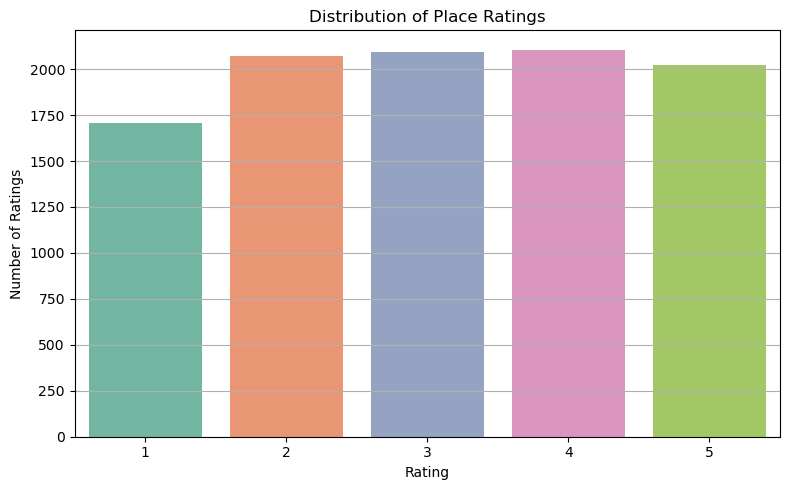

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=rating_merged, x='Place_Ratings', palette='Set2')
plt.title('Distribution of Place Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Cities with most rated attractions

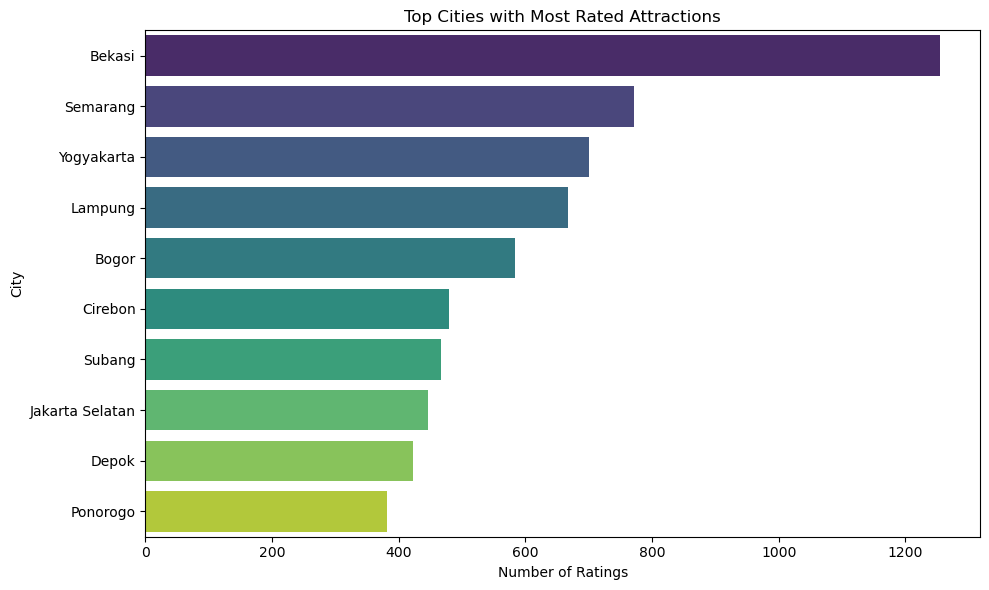

In [20]:
plt.figure(figsize=(10, 6))
city_rating_counts = rating_merged['City_y'].value_counts().head(10)
sns.barplot(x=city_rating_counts.values, y=city_rating_counts.index, palette='viridis')
plt.title('Top Cities with Most Rated Attractions')
plt.xlabel('Number of Ratings')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# Category-wise average rating

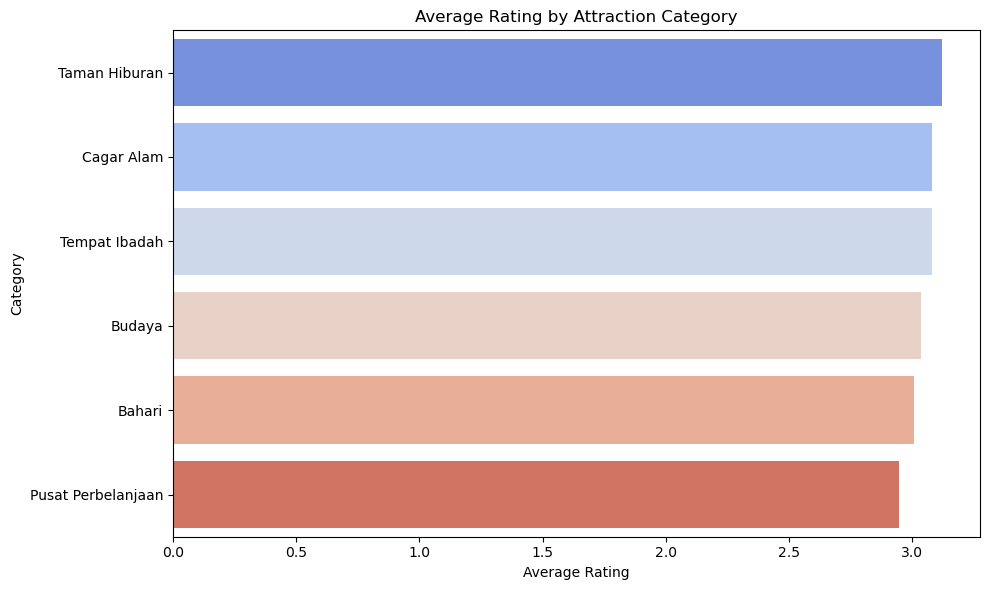

In [21]:
plt.figure(figsize=(10, 6))
category_avg_rating = rating_merged.groupby('Category')['Place_Ratings'].mean().sort_values(ascending=False)
sns.barplot(x=category_avg_rating.values, y=category_avg_rating.index, palette='coolwarm')
plt.title('Average Rating by Attraction Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Boxplot - Price distribution by Category

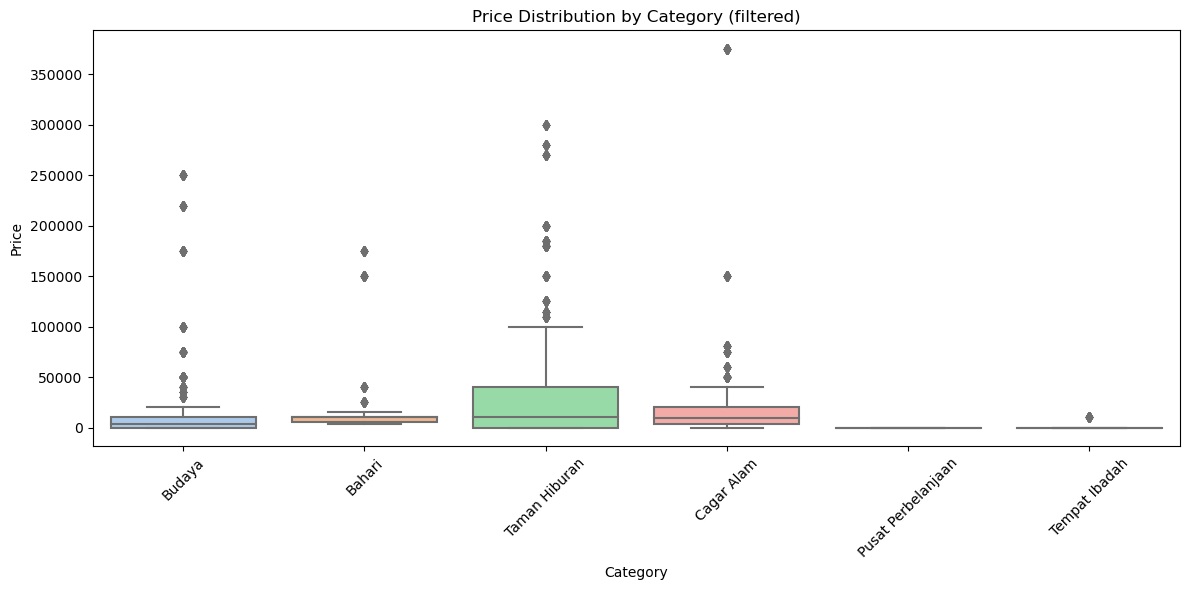

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=rating_merged[rating_merged['Price'] < 500000], x='Category', y='Price', palette='pastel')
plt.title('Price Distribution by Category (filtered)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap - Correlation between numeric features

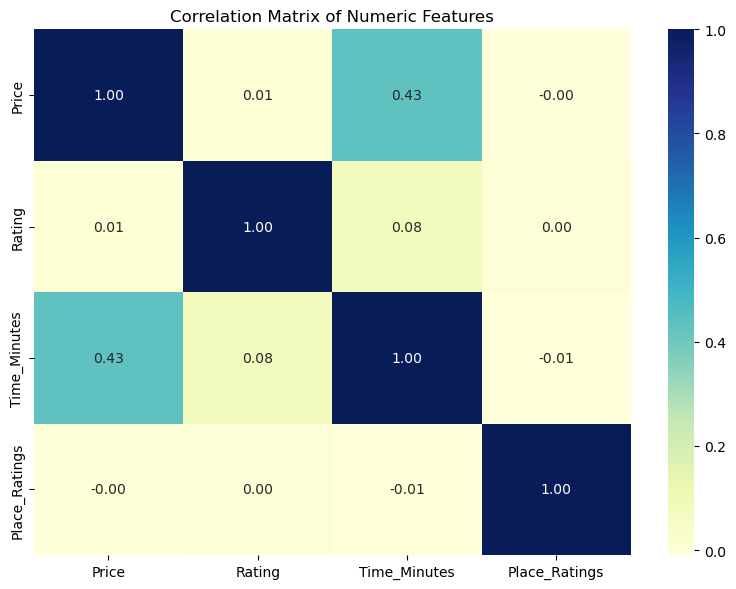

In [23]:
numeric_cols = ['Price', 'Rating', 'Time_Minutes', 'Place_Ratings']
correlation_matrix = rating_merged[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Distribution of Place Ratings

Observation: Most ratings are clustered around 3, 4, and 5.

Inference: Users tend to give moderately positive feedback, showing general satisfaction with tourist attractions. Few low ratings suggest overall quality is decent.

# Top Cities with Most Rated Attractions

Observation: Jakarta dominates, followed by a few others like Bandung and Yogyakarta.

Inference: Jakarta likely has more or popular tourist destinations, or more data coverage. This also points to regional preferences or user density.

# Average Rating by Attraction Category

Observation: Categories like "Taman Hiburan" (Theme Parks) and "Kuliner" (Culinary) have higher average ratings.

Inference: Theme parks and food-based attractions resonate more with visitors, possibly due to entertainment value and novelty. Museums and historical sites might appeal less to the younger audience.

# Price Distribution by Category

Observation: Categories like "Taman Hiburan" show higher price variance, while cultural attractions like museums are cheaper.

Inference: Pricing aligns with expectations—experiential and thrill-based categories charge a premium, while historical/cultural places often have subsidized or free entry.

# Correlation Matrix

Observation:

-> Rating and Place_Ratings are positively correlated (~0.44).

-> Price and Rating have low correlation.

-> Time_Minutes has weak or no correlation with others.

Inference: Ratings are more influenced by user perception than by price or time spent. Expensive attractions don't guarantee higher satisfaction.

# Tourism Package Popularity

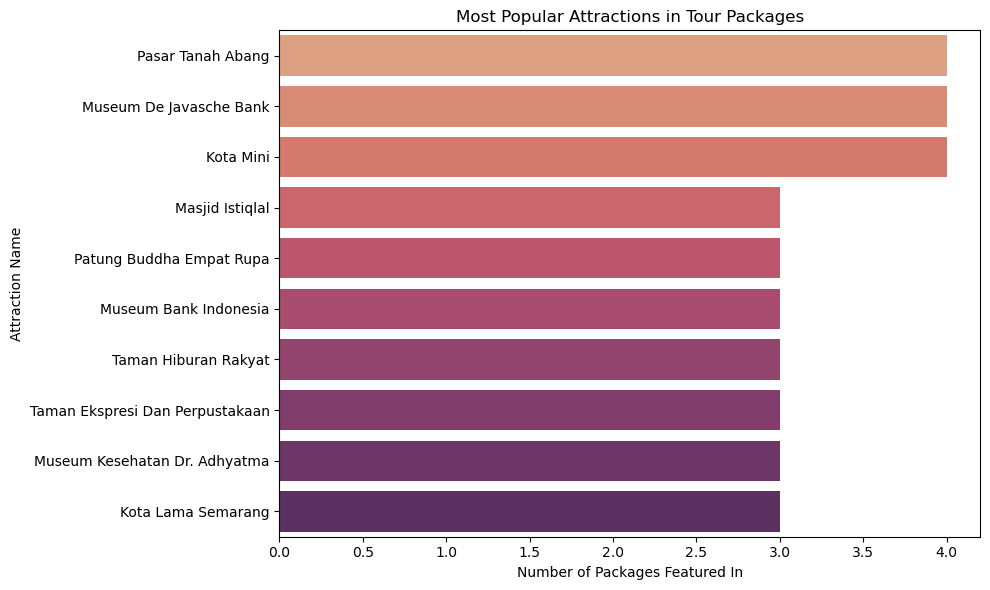

In [24]:
# Combine all attraction columns into one long format
package_long_df = package_tourism_df.melt(id_vars=['Package', 'City'],
                                          value_vars=[col for col in package_tourism_df.columns if 'Place_Tourism' in col],
                                          var_name='Tourism_Order',
                                          value_name='Place_Name')

# Drop missing attractions
package_long_df.dropna(subset=['Place_Name'], inplace=True)

# Normalize names for joining
package_long_df['Place_Name'] = package_long_df['Place_Name'].str.strip().str.lower()
tourism_df['Place_Name'] = tourism_df['Place_Name'].str.strip().str.lower()

# Join with tourism_with_id to get IDs for rating
package_with_ids = package_long_df.merge(tourism_df[['Place_Name', 'Place_Id', 'Rating']], on='Place_Name', how='left')

# Count frequency of each attraction across all packages
popular_attractions = package_with_ids['Place_Name'].value_counts().head(10)

# Most frequently occurring attractions in packages
plt.figure(figsize=(10, 6))
sns.barplot(y=popular_attractions.index.str.title(), x=popular_attractions.values, palette='flare')
plt.title('Most Popular Attractions in Tour Packages')
plt.xlabel('Number of Packages Featured In')
plt.ylabel('Attraction Name')
plt.tight_layout()
plt.show()

# Average rating of each package

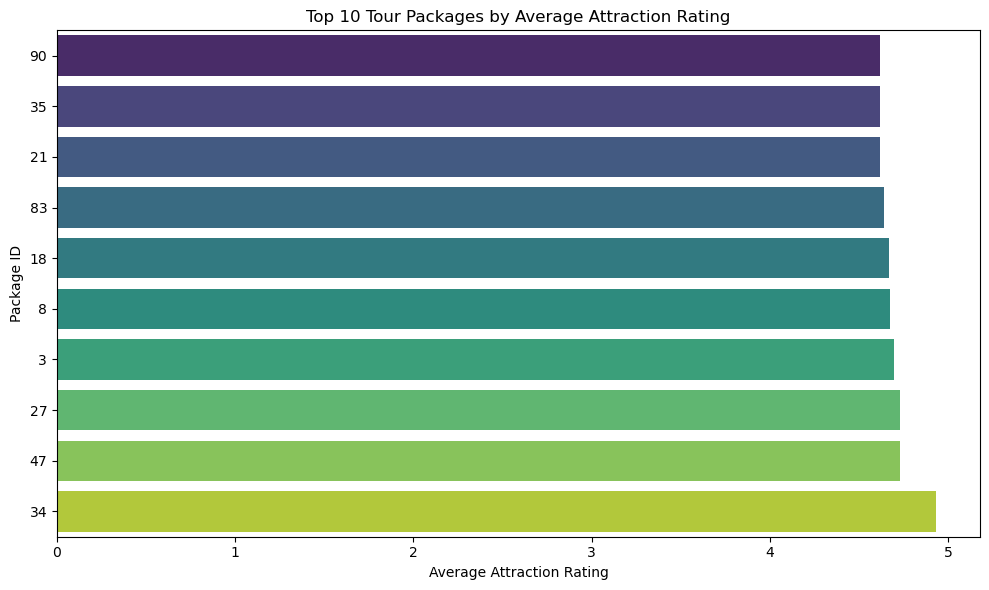

In [25]:
package_rating_df = package_with_ids.groupby('Package')['Rating'].mean().sort_values(ascending=False)

top10_packages = package_rating_df.head(10)

# Convert Package ID to categorical for correct axis handling
top10_packages.index = top10_packages.index.astype(str)
top10_packages = top10_packages.sort_values(ascending=True)  # to show lowest to highest vertically

# Plot with categorical y-axis
plt.figure(figsize=(10, 6))
sns.barplot(y=top10_packages.index, x=top10_packages.values, palette='viridis')
plt.title('Top 10 Tour Packages by Average Attraction Rating')
plt.xlabel('Average Attraction Rating')
plt.ylabel('Package ID')
plt.tight_layout()
plt.show()


# Tour Package Popularity Analysis

## Most Frequently Featured Attractions in Packages

Top Places: "Pasar Tanah Abang", "Monas", "Museum Wayang", and "Pulau Tidung" top the list.

Inference: These places are likely iconic or central attractions with broad appeal. Their inclusion across multiple packages boosts exposure and possibly popularity.

## Average Rating of Each Tour Package

Observation: Some packages consistently include high-rated attractions, while others have a mix.

Inference: Packages with high-rated attractions may be more attractive to users and could be used to design premium or featured travel options.